Statistical Errors and the Gaussian Distribution
==========================

Statistical uncertainties quantify random errors in measurement: they describe the spread in results that would occur if the measurement were repeated a very large number of times.  We usually assume that statistical errors cause the measured results to be distributed about the true value in a **normal** or **Gaussian** distribution:

$$
G(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

The parameters of the Gaussian distribution are its **mean** *&mu;* and its **width** *&sigma;*.  The standard Gaussian function is normalised such that its integral is 1, so to describe a dataset with *N* measurements we need to multiply by *N*.

The code below plots two Gaussians with the same mean *&mu;*, one with width &sigma; (blue) and the other with width &sigma;/2 (red), together with the points with error bars that would correspond to these distributions: &mu; &plusmn; &sigma; blue) and &mu; &plusmn; &sigma;/2 (red). 


<Container object of 3 artists>

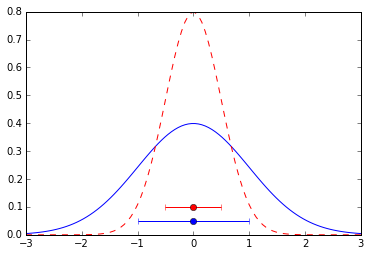

In [23]:
%matplotlib inline

import matplotlib.pyplot as p
import numpy as np

def gaussian(x,mu,sigma):
    return np.exp(-0.5*np.power((x-mu)/sigma,2))/(2.50663*sigma)

mu = 0.0
sigma = 1.0
xmin = -3.0
xmax = +3.0
nbins=100
x=np.linspace(xmin,xmax,nbins)

plt.plot(x,gaussian(x,mu,sigma),'b',x,gaussian(x,mu,sigma/2),'r--')
plt.errorbar(mu,0.05,xerr=sigma,yerr=None,fmt='o')
plt.errorbar(mu,0.1,xerr=sigma/2,yerr=None,fmt='o',mfc='red',ecolor='red')

Notice that the probability that a particular measurement will lie **outside** the range &mu; &plusmn; &sigma; is quite large (roughly 1 in 3).  The **standard deviation** *&sigma;* quantifies the **probable error** in a measurement, not the largest possible error. 

The error on a measurement and the error on the mean
---------------------------------------------------------

The standard deviation &sigma; corresponds to the uncertainty on a single measurement _x_<sub>i</sub>.  It is common to repeat measurements to improve accuracy.  The error on the mean of *N* measurements is given by &sigma;/_&radic;N_: if you repeat the measurement 25 times, your error bar will decrease by a factor of 5.

The code below plots the distributions for 1 measurement (blue) and _N_ measurements (red), assuming the same mean &mu; and standard deviation &sigma;.  The points show the corresponding error bar for one measurement (blue) and the mean of _N_ measurements (red).

<Container object of 3 artists>

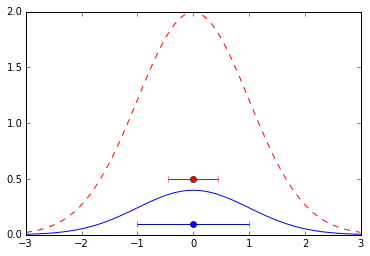

In [27]:
%matplotlib inline

import matplotlib.pyplot as p
import numpy as np

def gaussian(x,mu,sigma):
    return np.exp(-0.5*np.power((x-mu)/sigma,2))/(2.50663*sigma)

mu = 0.0
sigma = 1.0
xmin = -3.0
xmax = +3.0
nbins=100
x=np.linspace(xmin,xmax,nbins)

N=5

plt.plot(x,gaussian(x,mu,sigma),'b',x,N*gaussian(x,mu,sigma),'r--')
plt.errorbar(mu,0.1,xerr=sigma,yerr=None,fmt='o')
plt.errorbar(mu,0.5,xerr=sigma/np.power(N,0.5),yerr=None,fmt='o',mfc='red',ecolor='red')

Calculating the mean and standard deviation of a set of data
------------------------------------------------------------------

Of course, we do not normally know the true mean and standard deviation of our data &ndash; we have to calculate these from the data.  For repeated measurements using the same set-up (and therefore presumably drawn from the same Gaussian), it can be shown that the best estimates of &mu; and &sigma; are given by
$$
\bar{x} = \frac{1}{N}\sum\limits_{i=1}^{N} x_i
$$
and
$$
\sigma = \sqrt{\left(\frac{1}{N-1}\sum\limits_{i=1}^{N}(x-\bar{x})^2\right)}.
$$
The reason for the factor of (_N_ &minus; 1) instead of _N_ in the definition of &sigma; is that we have already used up one **degree of freedom** in calculating _x&#773;_.  We will come across the concept of degrees of freedom again when looking at fitting functions to data.  It's also easy to justify conceptually: &sigma; describes the *spread* of the measured points about the true value, and it is clearly impossible to determine what the spread is if you do not know the true value already and you only have one data point!

In the code below, 'data' is an array containing _N_ numbers which were generated using a Gaussian random number generator with a nominal mean of &mu; and standard deviation of &sigma;.  The plot shows the data (blue squares), the mean (red point with error bars) and the limits _x&#773;_ &plusmn; _&sigma;_ (red dashed lines).

xmean = 0.609  +/- 0.278
sigma = 1.755


<Container object of 3 artists>

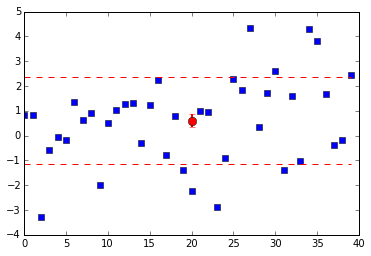

In [98]:
%matplotlib inline

import matplotlib.pyplot as p
import numpy as np

N = 40

mu = 0.30
truesigma = 2.00
data = np.random.normal(mu,truesigma,N)

sumx=sum(data)
ndata=len(data)
xmean=sumx/ndata

sumxsq=0
for x in data:
    sumxsq=sumxsq+np.power(x-xmean,2)
    
sigma=np.sqrt(sumxsq/(ndata-1))
sigmabar=sigma/np.sqrt(ndata)

print('xmean = %5.3f'%xmean,' +/- %5.3f'%sigmabar)
print('sigma = %5.3f'%sigma)

plt.plot(data,'bs',[0,ndata-1],[xmean-sigma,xmean-sigma],'r--',[0,ndata-1],[xmean+sigma,xmean+sigma],'r--')
plt.errorbar(ndata/2,xmean,yerr=sigmabar,fmt='o',mfc='red',ecolor='red',elinewidth=2,ms=8)

If you change _N_, you should see that the error on the mean decreases, to the point where the error bars on the point will be invisible for _N_ &gt; 100 or so.  You should find that the calculated mean is within its error bar of the true mean at least 2/3 of the time, but the calculated sigma may differ significantly from the true &sigma; if _N_ is small. 

Agreement between data and expectation
------------------------------------------

Suppose you wish to compare your measured value, &_x_ &plusmn; _&sigma;_, with a theoretical prediction, _X_.
As we saw above, there is about a 1 in 3 chance that |_x_ &minus; _X_| &gt; _&sigma;_.  In order to calculate the probability that your value _x_ is consistent with the predicted value _X_, you need to integrate over the Gaussian probability distribution.  Integrating the Gaussian is not trivial, but fortunately most programming languages provide built-in functions to calculate it.  A commonly supplied example is the **error function** erf(_x_), defined as
$$
\mbox{erf}(x)=\frac{1}{\sqrt{\pi}}\int_{-x}^{x}e^{-t^2}\,\mathrm{d}t.
$$
This is the probability that a measurement drawn from a Guassian with mean 0 and &sigma;<sup>2</sup> = &frac12; will lie between &minus;_x_ and +_x_.  (Don't ask me why they picked &sigma; = 1/&radic;2 instead of &sigma; = 1, but unfortunately that's the standard definition.)  This can be scaled to any value of &sigma; by using erf(_x_/(&sigma;&radic;2)) instead of erf(_x_).

The code below prints the probabilities that a measured value lies within 1, 2, 3 and 4&sigma; of the mean, and also that it lies with _x_ of the mean if the width of the underlying Gaussian is &sigma;.  Note that we are more often interested in the probability that it lies *outside* this range, i.e. that we could, by chance, obtain a measured value that is *at least x* away from the mean, **even though the prediction is in fact correct**.  This value is just 
$$
1 - \mbox{erf}\left(\frac{x}{\sqrt{2}\sigma}\right)
$$
as given in the last line.  Notice that the Python maths library provides a separate function, erfc(_x_), to calculate this, in order to avoid loss of precision when _x_ &#8811; 1/&radic;2.

In [94]:
import numpy as np
import math as mt

sigma = 0.15
x = 0.35

onesig = 100.*mt.erf(1.0/(np.sqrt(2)))
twosig = 100.*mt.erf(2.0/(np.sqrt(2)))
threesig = 100.*mt.erf(3.0/(np.sqrt(2)))
foursig = 100.*mt.erf(4.0/(np.sqrt(2)))
xsig = 100.*mt.erf(x/(np.sqrt(2)*sigma))
xsigc = 100.*(mt.erfc(x/(np.sqrt(2)*sigma)))

print('The probability that x lies within 1 sigma of xmean is %6.3f'%onesig,'percent.')
print('The probability that x lies within 2 sigma of xmean is %6.3f'%twosig,'percent.')
print('The probability that x lies within 3 sigma of xmean is %6.3f'%threesig,'percent.')
print('The probability that x lies within 4 sigma of xmean is %8.5f'%foursig,'percent.')
print('The probability that x lies within %5.3f'%x,'of xmean is %7.5f'%xsig,'percent when sigma = %6.3f'%sigma)
print('and the probability that x lies outside this range is %7.5f'%xsigc,'percent.')

The probability that x lies within 1 sigma of xmean is 68.269 percent.
The probability that x lies within 2 sigma of xmean is 95.450 percent.
The probability that x lies within 3 sigma of xmean is 99.730 percent.
The probability that x lies within 4 sigma of xmean is 99.99367 percent.
The probability that x lies within 0.350 of xmean is 98.03693 percent when sigma =  0.150
and the probability that x lies outside this range is 1.96307 percent.
